# Criado por: Gabriel dos Santos, Hugo Botelho Santana, João Victor Gomes Macedo e Caíque Santos Santana

# Projeto: Predição de Insuficiência Cardíaca (Heart Failure Prediction Dataset)

## Objetivos:
O objetivo desse prejeto é realizar a construção de um modelo que faça a predição de insuficiência cardíaca de pacientes, utilizando modelos preditivos aplicados ao dataset 'Heart Failure Prediction Dataset' do Kaggle. O projeto envolve desde a análise exploratória dos dados até a validação do modelo. O dataset apresenta as seguinte colunas:

*   **Age:** Idade do paciente [anos].

*   **Sex:** Sexo do paciente [M: Masculino, F: Feminino].

*   **ChestPainType:** Tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginal, ASY: Assintomático].

*   **RestingBP:** Pressão arterial em repouso [mm Hg].

*  **Cholesterol:** Colesterol sérico [mm/dl].

*   **FastingBS:** Glicemia em jejum [1: se Glicemia em jejum > 120 mg/dl, 0: caso contrário].

*   **RestingECG:** Resultados do eletrocardiograma em repouso [Normal: Normal, ST: anormalidade na onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV), LVH: hipertrofia ventricular esquerda provável ou definitiva pelos critérios de 'Estes'].

*   **MaxHR:** Frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202].

*   **ExerciseAngina:** Angina induzida por exercício [Y: Sim, N: Não].

*   **Oldpeak:** Oldpeak = ST [Valor numérico medido em depressão].

*   **ST_Slope:** Inclinação do segmento ST no pico do exercício [Up: ascendente, Flat: plano, Down: descendente].

*   **HeartDisease:** Target [1: doença cardíaca, 0: Normal].

# Importando o Dataset e Bibliotecas

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12, 7)

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Análise Exploratória de Dados

### Análise Geral

In [57]:
df.shape

(918, 12)

In [58]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [59]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [61]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [62]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Observe que alguns valores são incoerentes com a realidade, como: RestingBP, Cholesterol, Oldpeak, FastingBS. Sendo alguns zerados ou até negativos como no caso do Oldpeak. Outra observação é que existe uma diferença muito grande entre os valores máximos e 75% do Oldpeak, indicando um possível Outlier.

In [63]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

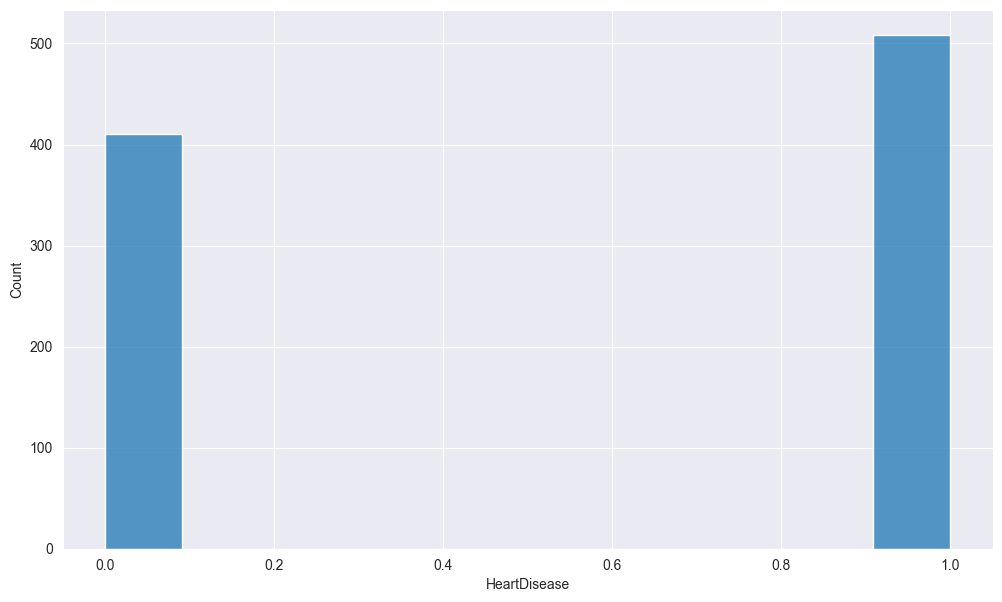

In [64]:
sns.histplot(df, x='HeartDisease')
plt.show()

*Obs:* É um dataset balanceado.

In [65]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


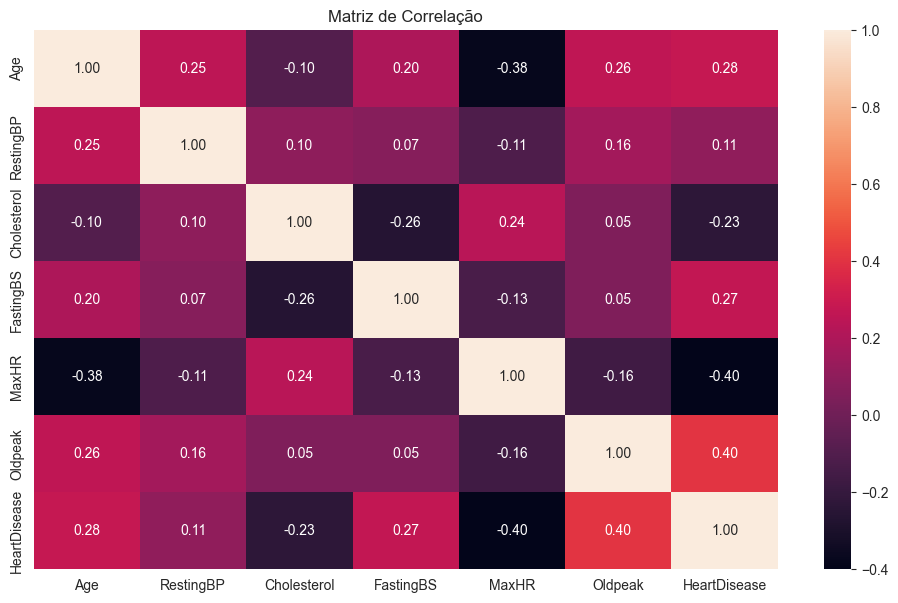

In [66]:
matriz_corr = df.corr(numeric_only=True)
sns.heatmap(matriz_corr, annot=True, fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [67]:
numeric_column = df.select_dtypes(include=['number']).drop('HeartDisease', axis=1)

grafico_dispersao = px.scatter_matrix(df, dimensions=numeric_column, color='HeartDisease', height=800)
grafico_dispersao.show()

In [68]:
restingBp_invalido = (df['RestingBP'] == 0).sum()
cholesterol_invalido = (df['Cholesterol'] == 0).sum()
oldpeak_invalido = (df['Oldpeak'] < 0).sum()

print(f'A quantidade valores invalidos do restingBp é igual a: {restingBp_invalido}')
print(f'A quantidade valores invalidos do cholesterol é igual a: {cholesterol_invalido}')
print(f'A quantidade valores invalidos do oldpeak é igual a: {oldpeak_invalido}')


A quantidade valores invalidos do restingBp é igual a: 1
A quantidade valores invalidos do cholesterol é igual a: 172
A quantidade valores invalidos do oldpeak é igual a: 13


Como os valores de colesterol são maiores que 5% do dataset, então é interessante não dropar esses dados, e sim substituir pela mediana. No entanto, vale dropar os dados inválidos de restingbp e oldpeak, pois são menos que 5%.

### Análise Univariada

#### Age

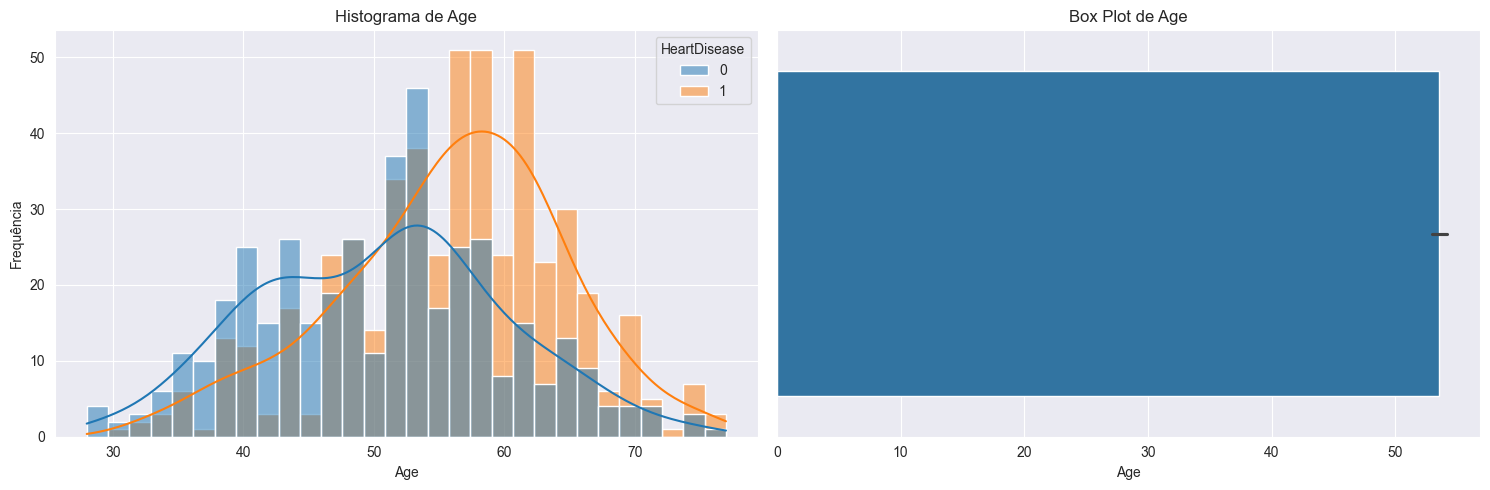

In [76]:
plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'Age', kde=True, bins=30, hue='HeartDisease')
plt.title('Histograma de Age')
plt.xlabel('Age')
plt.ylabel('Frequência')

# Box Plot
plt.subplot(1, 2, 2)
sns.barplot(x=df['Age'])
plt.title(f'Box Plot de Age')
plt.xlabel('Age')

plt.tight_layout()

#### RestingBP

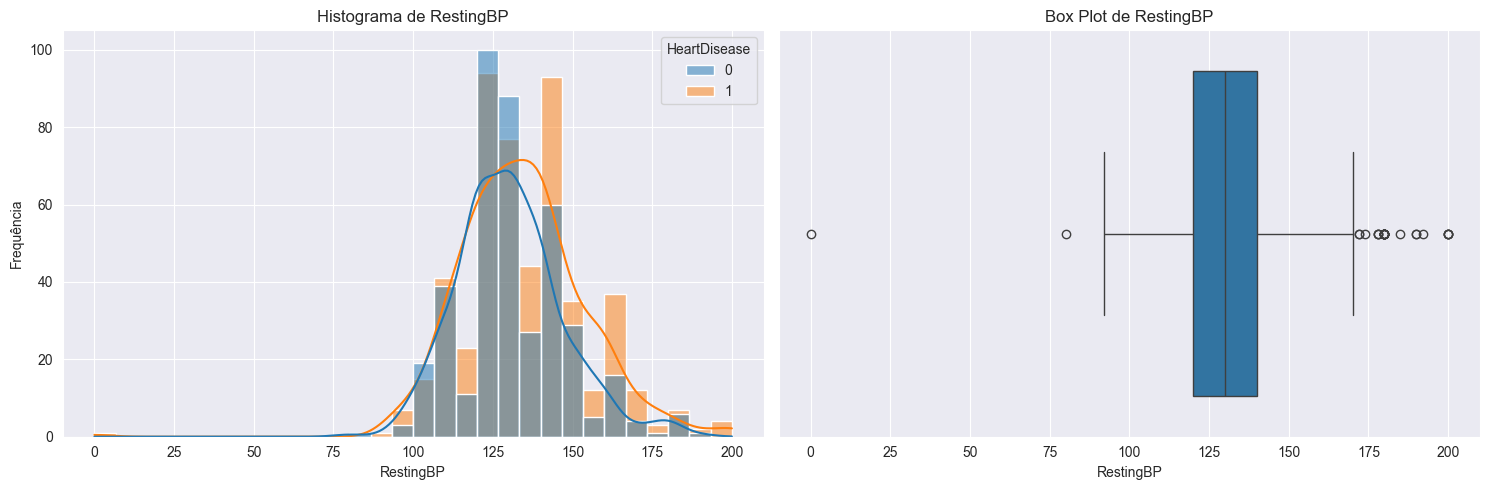

In [70]:
plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'RestingBP', kde=True, bins=30, hue='HeartDisease')
plt.title('Histograma de RestingBP')
plt.xlabel('RestingBP')
plt.ylabel('Frequência')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['RestingBP'])
plt.title(f'Box Plot de RestingBP')
plt.xlabel('RestingBP')

plt.tight_layout()

#### Cholesterol

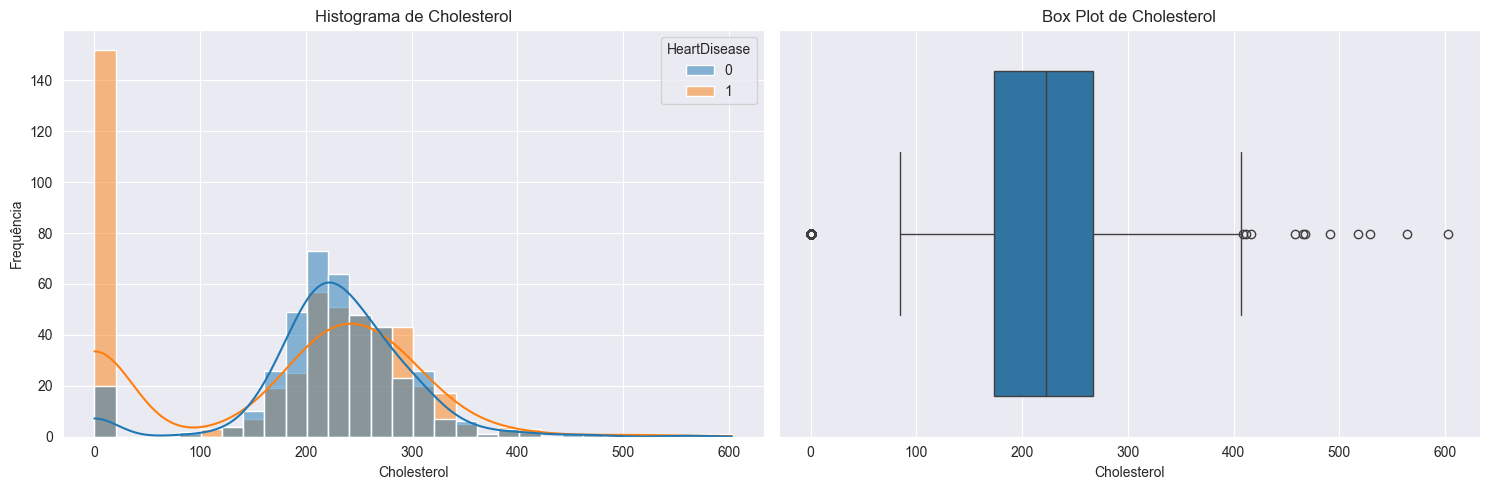

In [71]:
plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'Cholesterol', kde=True, bins=30, hue='HeartDisease')
plt.title('Histograma de Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequência')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Cholesterol'])
plt.title(f'Box Plot de Cholesterol')
plt.xlabel('Cholesterol')

plt.tight_layout()

#### MaxHR

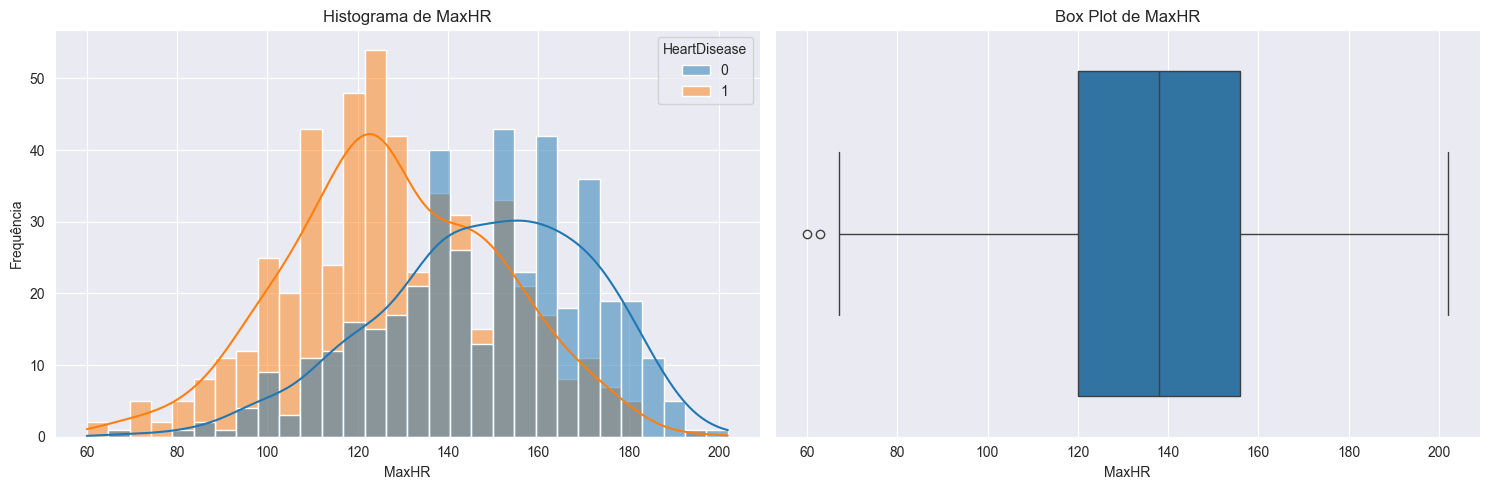

In [72]:
plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'MaxHR', kde=True, bins=30, hue='HeartDisease')
plt.title('Histograma de MaxHR')
plt.xlabel('MaxHR')
plt.ylabel('Frequência')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['MaxHR'])
plt.title(f'Box Plot de MaxHR')
plt.xlabel('MaxHR')

plt.tight_layout()

#### Oldpeak

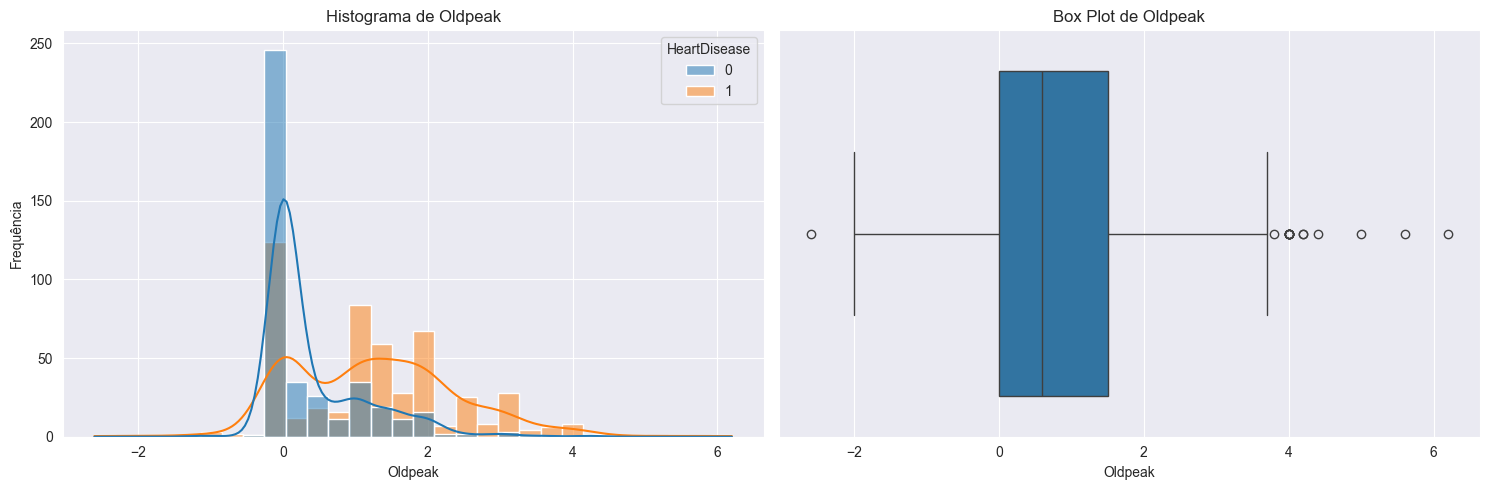

In [73]:
plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'Oldpeak', kde=True, bins=30, hue='HeartDisease')
plt.title('Histograma de Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frequência')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Oldpeak'])
plt.title(f'Box Plot de Oldpeak')
plt.xlabel('Oldpeak')

plt.tight_layout()

### Distribuição das variáveis categóricas

In [74]:
categoricas = df.select_dtypes(include=['object']).columns.tolist()
categoricas.extend(['FastingBS', 'HeartDisease'])

print(categoricas)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']


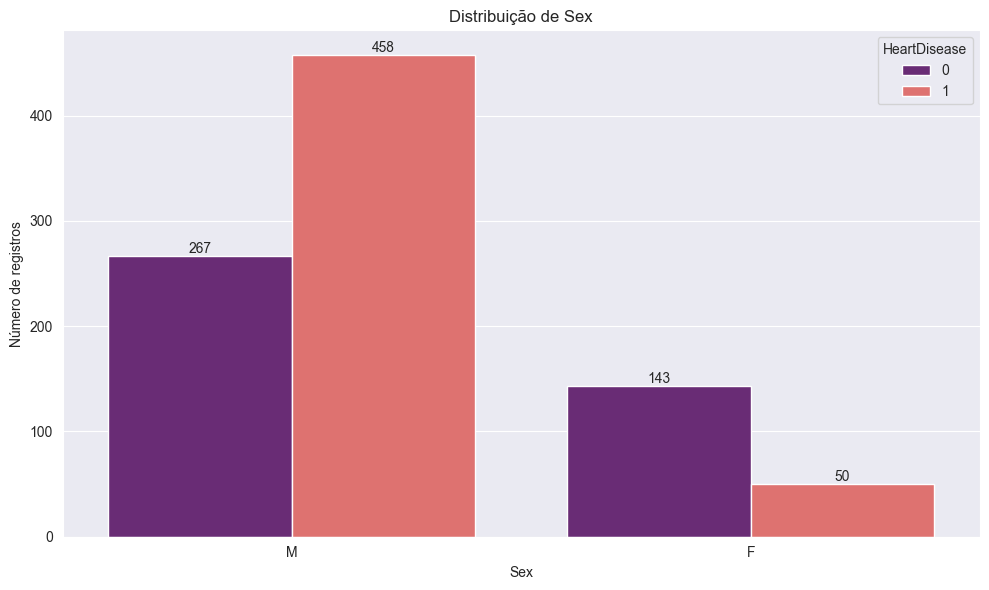

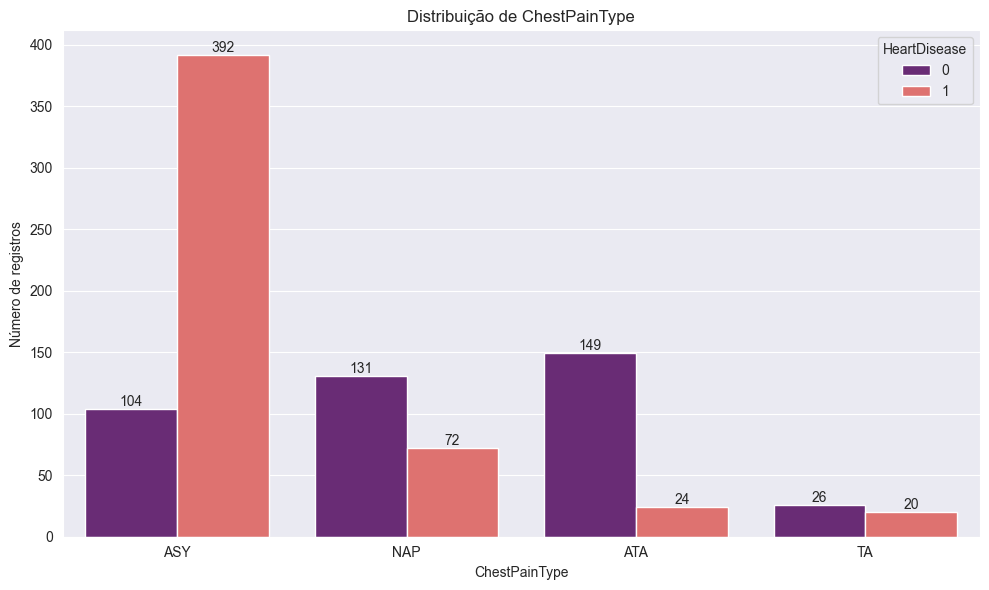

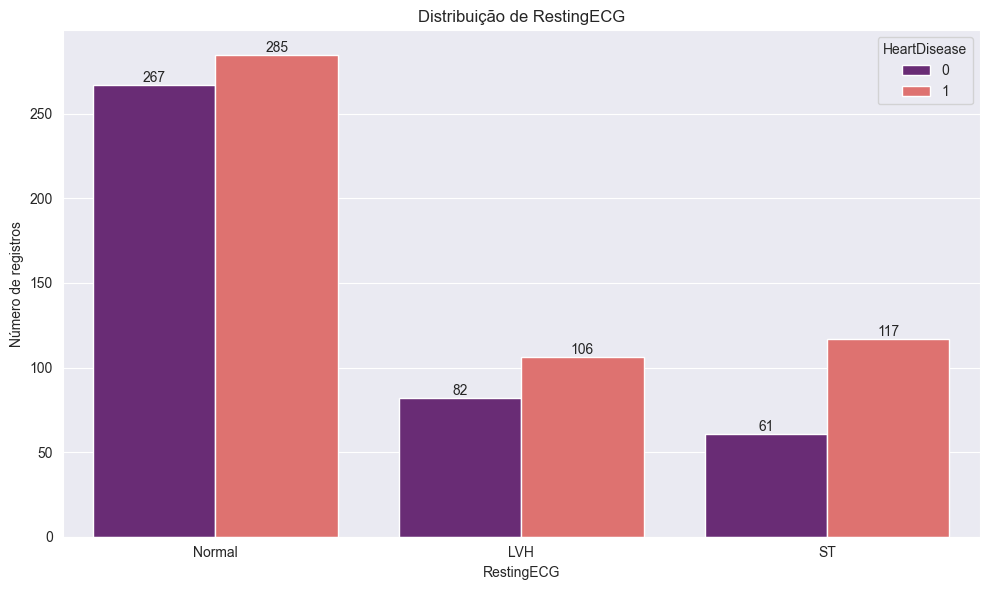

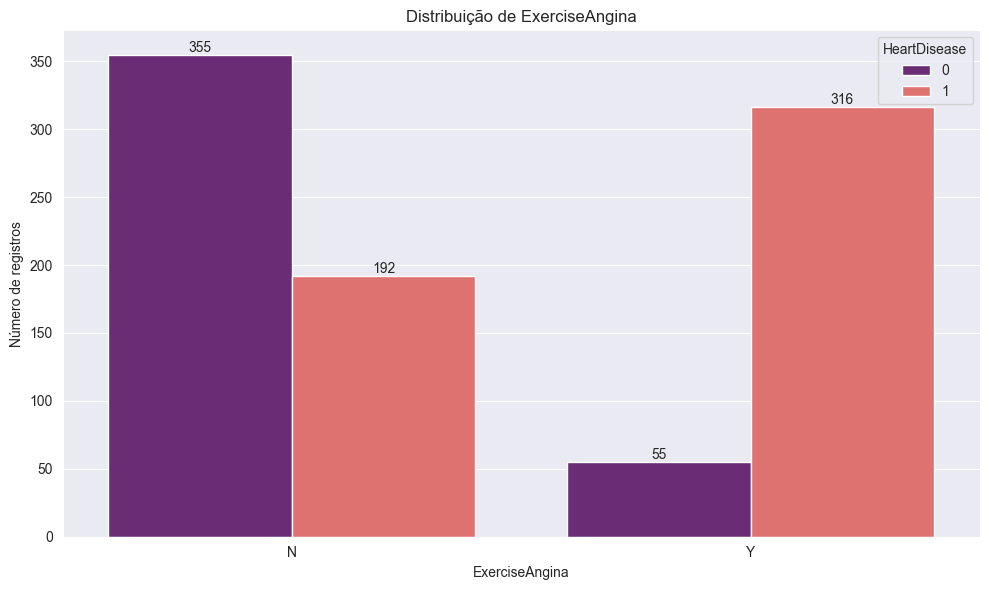

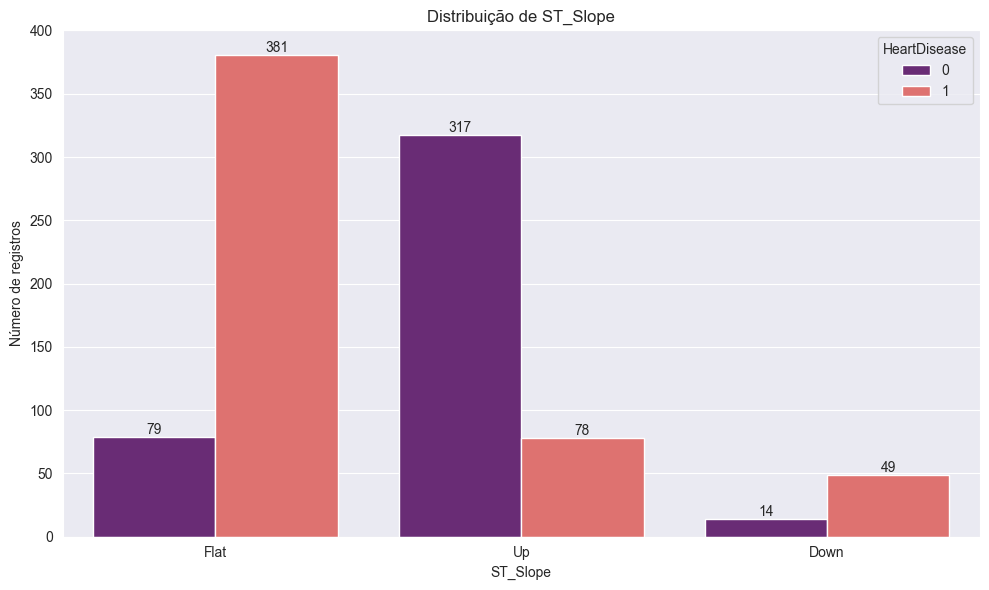

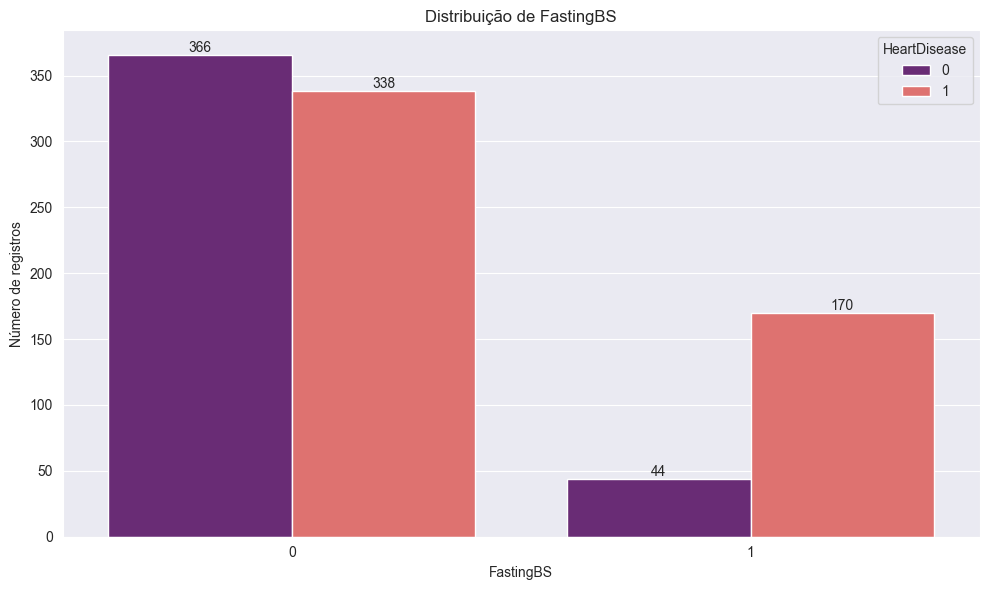

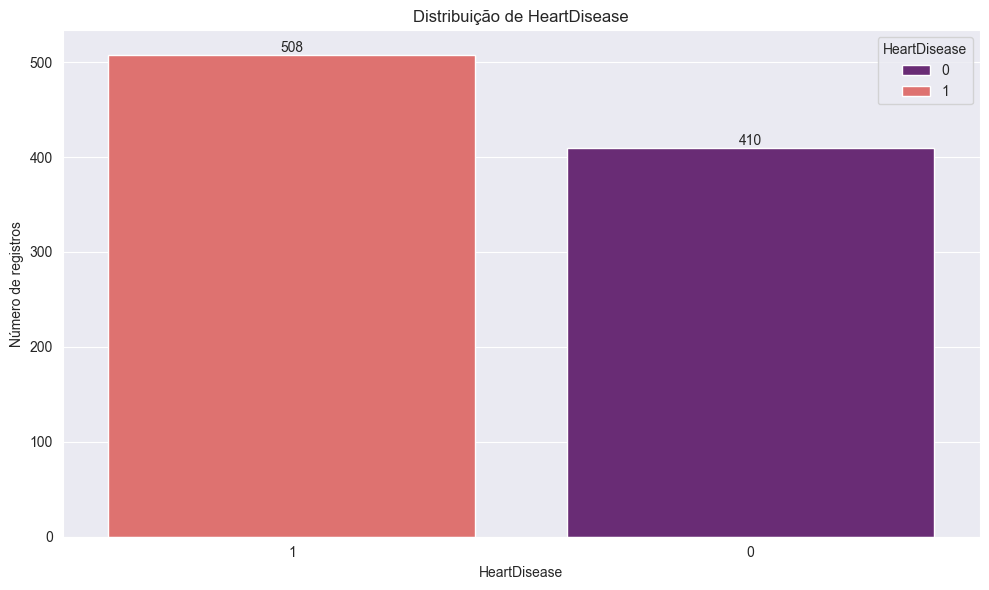

In [80]:
for coluna in categoricas:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=coluna, order=df[coluna].value_counts().index, palette='magma', hue='HeartDisease')
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Número de registros')
    # Adicionar contagens nas barras
    for container in ax.containers:
        ax.bar_label(container)
    # plt.xticks(rotation=45, ha='right')
    plt.tight_layout()